# **Import libraries**

In [ ]:
# Importing all the Libraries
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

# **Read Dataset**

In [ ]:
# Google drive mounted locally
from google.colab import drive
drive.mount('/content/drive')
% ls      
% cd drive/   
% ls
% cd My\ Drive  
% ls
!head -4 data/output.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/  sample_data/
/content/drive
MyDrive/
/content/drive/My Drive
 bq-results-20211115-164409-qu1u4q94j0u4/  'half dissertation'/
 bq-results-20211115-171708-9d60r7sjz825/   histogram_numeric_variables.png
'Colab Notebooks'/                          numeric_feature_histogram.png
 data/                                      sf_neighborhoods.json
'Dissertation document'/
Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
83284852,660,8282,02/01/2019 17:47,94,"Bricklayers Arms, Borough",02/01/2019 17:36,197,"Stamford Street, South Bank"
83360769,180,4657,06/01/2019 18:14,94,"Bricklayers Arms, Borough",06/01/2019 18:11,269,"Empire Square, The Borough"
83280311,960,6306,02/01/2019 14:49,374,"Waterloo Station 1, Waterloo",02/01/2019 14:33,5,"Sedding Street, Sloane Square"


In [ ]:
# CSV file is read to import the dataset
# https://stackoverflow.com/questions/15008970/way-to-read-first-few-lines-for-pandas-dataframe - limiting the lines of rows i read in dataframe
sfpd = pd.read_csv('data/output.csv', skiprows=range(2, 20000), nrows=200000)
# sfpd = pd.read_csv('data/output.csv')

# **Data Exploration**

In [ ]:
# Information related to sfpd dataset is being displayed
sfpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Rental Id          200000 non-null  int64 
 1   Duration           200000 non-null  int64 
 2   Bike Id            200000 non-null  int64 
 3   End Date           200000 non-null  object
 4   EndStation Id      200000 non-null  int64 
 5   EndStation Name    200000 non-null  object
 6   Start Date         200000 non-null  object
 7   StartStation Id    200000 non-null  int64 
 8   StartStation Name  200000 non-null  object
dtypes: int64(5), object(4)
memory usage: 13.7+ MB


In [ ]:
# Determing the coulmn names of the dataset
sfpd.columns

Index(['Rental Id', 'Duration', 'Bike Id', 'End Date', 'EndStation Id',
       'EndStation Name', 'Start Date', 'StartStation Id',
       'StartStation Name'],
      dtype='object')

In [ ]:
# Finding the total number of columns and rows of the dataset
print('sfpd has  {} columns and {} rows.'.format(sfpd.shape[0], sfpd.shape[1]))

sfpd has  200000 columns and 9 rows.


In [ ]:
# Dataframe statistical information can be gathered using function named as .describe()
sfpd.describe()

,Rental Id,Duration,Bike Id,EndStation Id,StartStation Id
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000
mean,8.340699e+07,1043.931000,8842.560025,365.930565,352.200650
std,9.114320e+04,3455.886684,4919.930979,242.968990,240.675271
min,8.327016e+07,60.000000,1.000000,1.000000,1.000000
25%,8.333062e+07,480.000000,4581.000000,154.000000,138.000000
50%,8.339073e+07,780.000000,8936.000000,330.000000,311.000000
75%,8.348473e+07,1140.000000,13419.000000,573.000000,553.000000
max,8.359237e+07,484800.000000,16382.000000,839.000000,839.000000


In [ ]:
# Duration minimum value should not be negative and in the below results we could see that, there are no negative values and hence no outliers in the dataset.
sfpd.Duration.describe()

count    200000.000000
mean       1043.931000
std        3455.886684
min          60.000000
25%         480.000000
50%         780.000000
75%        1140.000000
max      484800.000000
Name: Duration, dtype: float64

## Distribution of numerical variables is being described

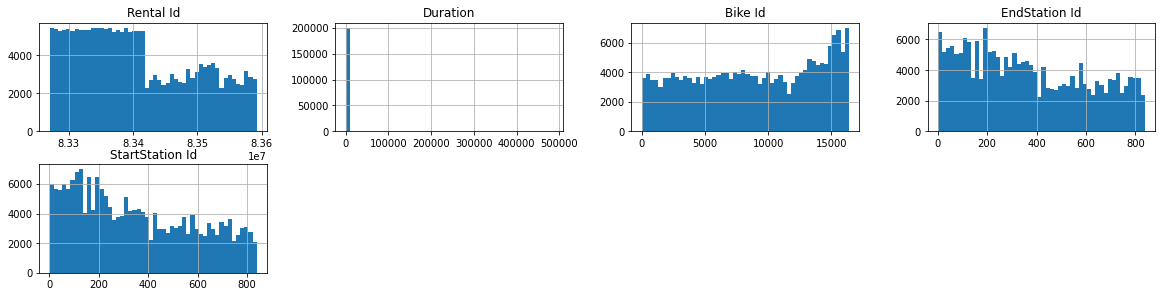

In [ ]:
%matplotlib inline
sfpd.hist(bins=50, figsize=(20,15),layout=(6,4))
plt.savefig('histogram_numeric_variables.png')
plt.show()

## Check if there are any missing values or not

In [ ]:
# function is created to calculate the missing value
def val_missing(sf):
# Finding out total number of values which are missing
 sfpd2 = sfpd.isnull().sum()
# Percentage of missing values
 percent_mis_val = 100 * sfpd.isnull().sum() / len(sf)
# Create table of results
 table_mis_val = pd.concat([sfpd2, percent_mis_val], axis=1)
# Names of coulnmn being renamed
 rename_table_mis_col = table_mis_val.rename(
 columns = {0 : 'Missing values', 1 : '% of Total Values'})
# The table is being sorted by missing descedning percentage
 rename_table_mis_col = rename_table_mis_col[
 rename_table_mis_col.iloc[:,1] != 0].sort_values(
'% of Total Values', ascending=False).round(1)
# Printing the details
 print ("sfpd has " + str(sfpd.shape[1]) + " columns.\n"
"and it has " + str(rename_table_mis_col.shape[0]) +
" columns which has missing values.")
# missing values datasframe is being returned
 return rename_table_mis_col

In [ ]:
val_miss = val_missing(sfpd)

val_miss.head(20)

sfpd has 9 columns.
and it has 0 columns which has missing values.


,Missing values,% of Total Values


In [ ]:
# To extract the first few rows .head() function is used
sfpd.head(2)

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,83284852,660,8282,02/01/2019 17:47,94,"Bricklayers Arms, Borough",02/01/2019 17:36,197,"Stamford Street, South Bank"
1,83280443,900,5139,02/01/2019 14:54,32,"Leonard Circus , Shoreditch",02/01/2019 14:39,14,"Belgrove Street , King's Cross"


In [ ]:
# The results of sfpd dataframe is copyed to new dataframe sfpd2
sfpd2 = sfpd.copy

## Check null values and if there are any duplicate rows or not

In [ ]:
sfpd.isna().sum()

Rental Id            0
Duration             0
Bike Id              0
End Date             0
EndStation Id        0
EndStation Name      0
Start Date           0
StartStation Id      0
StartStation Name    0
dtype: int64

In [ ]:
sfpd.isnull().sum()

Rental Id            0
Duration             0
Bike Id              0
End Date             0
EndStation Id        0
EndStation Name      0
Start Date           0
StartStation Id      0
StartStation Name    0
dtype: int64

In [ ]:
sfpd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 200000, dtype: bool

In [ ]:
sfpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Rental Id          200000 non-null  int64 
 1   Duration           200000 non-null  int64 
 2   Bike Id            200000 non-null  int64 
 3   End Date           200000 non-null  object
 4   EndStation Id      200000 non-null  int64 
 5   EndStation Name    200000 non-null  object
 6   Start Date         200000 non-null  object
 7   StartStation Id    200000 non-null  int64 
 8   StartStation Name  200000 non-null  object
dtypes: int64(5), object(4)
memory usage: 13.7+ MB


In [ ]:
# Duplicate rows are deleted
print(sfpd.duplicated(keep=False).value_counts())
sfpd2 = sfpd.drop_duplicates()

False    200000
dtype: int64


In [ ]:
sfpd2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
199995    False
199996    False
199997    False
199998    False
199999    False
Length: 200000, dtype: bool

In [ ]:
sfpd2.head(2)

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name
0,83284852,660,8282,02/01/2019 17:47,94,"Bricklayers Arms, Borough",02/01/2019 17:36,197,"Stamford Street, South Bank"
1,83280443,900,5139,02/01/2019 14:54,32,"Leonard Circus , Shoreditch",02/01/2019 14:39,14,"Belgrove Street , King's Cross"


# **Data Formatting**

In [ ]:
# coulmns are being dropped and it is being assigned to sfpd2
sfpd3=sfpd2.drop(['Rental Id','Bike Id','EndStation Id','StartStation Id'],axis=1)

In [ ]:
# Name of columns are being renamed 
sfpd4 = sfpd3.rename(columns={'End Date':'EndDate', 'EndStation Name':'EndStationName', 'Start Date':'StartDate', 'StartStation Name':'StartStationName'})

In [ ]:
sfpd4.head()

,Duration,EndDate,EndStationName,StartDate,StartStationName
0,660,02/01/2019 17:47,"Bricklayers Arms, Borough",02/01/2019 17:36,"Stamford Street, South Bank"
1,900,02/01/2019 14:54,"Leonard Circus , Shoreditch",02/01/2019 14:39,"Belgrove Street , King's Cross"
2,480,02/01/2019 08:28,"Great Russell Street, Bloomsbury",02/01/2019 08:20,"Belgrove Street , King's Cross"
3,720,02/01/2019 07:55,"Broadcasting House, Marylebone",02/01/2019 07:43,"Belgrove Street , King's Cross"
4,1020,04/01/2019 09:20,"Chapel Place, Marylebone",04/01/2019 09:03,"Belgrove Street , King's Cross"


In [ ]:
# The timestamp is converted to datetime format so we can separate date, time
sfpd4['StartDate'] = pd.to_datetime(sfpd4['StartDate'])

In [ ]:
# Separate year, month, day, weekday, hour from timestamp
sfpd4["Startyear"] = sfpd4['StartDate'].dt.year
sfpd4["Startmonth"] = sfpd4['StartDate'].dt.month
sfpd4["Startday_of_month"] = sfpd4['StartDate'].dt.day
sfpd4["Startday_of_week"] = sfpd4['StartDate'].dt.weekday
sfpd4["Starthour"] = sfpd4['StartDate'].dt.hour
sfpd4.head()

,Duration,EndDate,EndStationName,StartDate,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour
0,660,02/01/2019 17:47,"Bricklayers Arms, Borough",2019-02-01 17:36:00,"Stamford Street, South Bank",2019,2,1,4,17
1,900,02/01/2019 14:54,"Leonard Circus , Shoreditch",2019-02-01 14:39:00,"Belgrove Street , King's Cross",2019,2,1,4,14
2,480,02/01/2019 08:28,"Great Russell Street, Bloomsbury",2019-02-01 08:20:00,"Belgrove Street , King's Cross",2019,2,1,4,8
3,720,02/01/2019 07:55,"Broadcasting House, Marylebone",2019-02-01 07:43:00,"Belgrove Street , King's Cross",2019,2,1,4,7
4,1020,04/01/2019 09:20,"Chapel Place, Marylebone",2019-04-01 09:03:00,"Belgrove Street , King's Cross",2019,4,1,0,9


In [ ]:
sfpd4['EndDate'] = pd.to_datetime(sfpd4['EndDate'])

In [ ]:
#Separate year, month, day, weekday, hour from timestamp
sfpd4["Endyear"] = sfpd4['EndDate'].dt.year
sfpd4["Endmonth"] = sfpd4['EndDate'].dt.month
sfpd4["Endday_of_month"] = sfpd4['EndDate'].dt.day
sfpd4["Endday_of_week"] = sfpd4['EndDate'].dt.weekday
sfpd4["Endhour"] = sfpd4['EndDate'].dt.hour
sfpd4.head()

,Duration,EndDate,EndStationName,StartDate,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour
0,660,2019-02-01 17:47:00,"Bricklayers Arms, Borough",2019-02-01 17:36:00,"Stamford Street, South Bank",2019,2,1,4,17,2019,2,1,4,17
1,900,2019-02-01 14:54:00,"Leonard Circus , Shoreditch",2019-02-01 14:39:00,"Belgrove Street , King's Cross",2019,2,1,4,14,2019,2,1,4,14
2,480,2019-02-01 08:28:00,"Great Russell Street, Bloomsbury",2019-02-01 08:20:00,"Belgrove Street , King's Cross",2019,2,1,4,8,2019,2,1,4,8
3,720,2019-02-01 07:55:00,"Broadcasting House, Marylebone",2019-02-01 07:43:00,"Belgrove Street , King's Cross",2019,2,1,4,7,2019,2,1,4,7
4,1020,2019-04-01 09:20:00,"Chapel Place, Marylebone",2019-04-01 09:03:00,"Belgrove Street , King's Cross",2019,4,1,0,9,2019,4,1,0,9


In [ ]:
# Counting the maximum number of trip from one station
sfpd4.groupby("StartStationName")["StartStationName"].count().sort_values(ascending=False)

StartStationName
Belgrove Street , King's Cross          1655
Waterloo Station 3, Waterloo            1529
Waterloo Station 1, Waterloo            1328
Albert Gate, Hyde Park                  1325
Wormwood Street, Liverpool Street       1311
                                        ... 
Podium, Queen Elizabeth Olympic Park      24
Colet Gardens, Hammersmith                18
Teviot Street, Poplar                     17
Limburg Road, Clapham Junction            15
South Quay East, Canary Wharf              9
Name: StartStationName, Length: 787, dtype: int64

In [ ]:
sfpd4.head(2)

,Duration,EndDate,EndStationName,StartDate,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour
0,660,2019-02-01 17:47:00,"Bricklayers Arms, Borough",2019-02-01 17:36:00,"Stamford Street, South Bank",2019,2,1,4,17,2019,2,1,4,17
1,900,2019-02-01 14:54:00,"Leonard Circus , Shoreditch",2019-02-01 14:39:00,"Belgrove Street , King's Cross",2019,2,1,4,14,2019,2,1,4,14


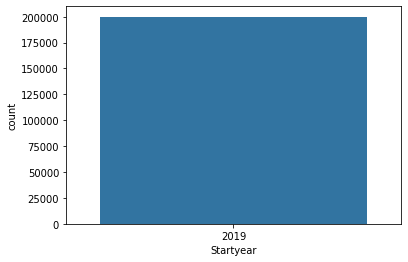

In [ ]:
# now let's see how many rows are there for each year
sns.countplot(x="Startyear", data=sfpd4)

In [ ]:
# coulmns are being dropped and it is being assigned to sfpd2
sfpd5=sfpd4.drop(['EndDate','StartDate'],axis=1)

In [ ]:
sfpd5.head(5)

,Duration,EndStationName,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour
0,660,"Bricklayers Arms, Borough","Stamford Street, South Bank",2019,2,1,4,17,2019,2,1,4,17
1,900,"Leonard Circus , Shoreditch","Belgrove Street , King's Cross",2019,2,1,4,14,2019,2,1,4,14
2,480,"Great Russell Street, Bloomsbury","Belgrove Street , King's Cross",2019,2,1,4,8,2019,2,1,4,8
3,720,"Broadcasting House, Marylebone","Belgrove Street , King's Cross",2019,2,1,4,7,2019,2,1,4,7
4,1020,"Chapel Place, Marylebone","Belgrove Street , King's Cross",2019,4,1,0,9,2019,4,1,0,9


# **Feature Extraction**

In [ ]:
# Season is extracted from month feild
def extract_season(month):
  """Determine season from month"""
  if 4 <= month <= 6:
    return 'summer'
  elif 7 <= month <= 9:
    return 'rainy'
  elif 10 <= month <= 12:
    return 'winter'
  else:
    return 'spring'

In [ ]:
sfpd5['Startmonth'] = pd.to_numeric(sfpd5['Startmonth'])
sfpd5['Season'] = sfpd5['Startmonth'].apply(lambda x:extract_season(x))

In [ ]:
sfpd5['Is_weekend'] = np.where(sfpd5['Startday_of_week'].isin(['Sunday','Saturday']),1,0)

In [ ]:
def extract_hour_type(hour):
    """Determine hour type from hour"""
    if (hour >= 4) and (hour < 12):
        return 'morning'
    elif (hour >= 12) and (hour < 15):
        return 'noon'
    elif (hour >= 15) and (hour < 18):
        return 'evening'
    elif (hour >= 18) and (hour < 22):
        return 'night'
    return 'mid-night'

def extract_time_period(hour):
    """Determine the time period from hour"""
    if hour in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
        return 'am'
    return 'pm'

In [ ]:
sfpd5['Starthour'] = pd.to_numeric(sfpd5['Starthour'])
sfpd5['HourType'] = sfpd5['Starthour'].apply(lambda x:extract_hour_type(x))

In [ ]:
sfpd5.head(5)

,Duration,EndStationName,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour,Season,Is_weekend,HourType
0,660,"Bricklayers Arms, Borough","Stamford Street, South Bank",2019,2,1,4,17,2019,2,1,4,17,spring,0,evening
1,900,"Leonard Circus , Shoreditch","Belgrove Street , King's Cross",2019,2,1,4,14,2019,2,1,4,14,spring,0,noon
2,480,"Great Russell Street, Bloomsbury","Belgrove Street , King's Cross",2019,2,1,4,8,2019,2,1,4,8,spring,0,morning
3,720,"Broadcasting House, Marylebone","Belgrove Street , King's Cross",2019,2,1,4,7,2019,2,1,4,7,spring,0,morning
4,1020,"Chapel Place, Marylebone","Belgrove Street , King's Cross",2019,4,1,0,9,2019,4,1,0,9,summer,0,morning


# **Exploratory Data Analysis**

In [ ]:
sfpd5['StartStationName'].unique()

array(['Stamford Street, South Bank', "Belgrove Street , King's Cross",
       'Salmon Lane, Limehouse', 'Bermondsey Street, Bermondsey',
       "Westfield Southern Terrace ,Shepherd's Bush",
       'Hollybush Gardens, Bethnal Green', 'Doddington Grove, Kennington',
       'Southwark Station 2, Southwark', 'Normand Park, West Kensington',
       'Sopwith Way, Battersea Park', 'Albert Square, Stockwell',
       'Whitehall Place, Strand', 'Lambeth Palace Road, Waterloo',
       'Pont Street, Knightsbridge', 'Waterloo Station 3, Waterloo',
       'Fashion Street, Whitechapel', 'Caldwell Street, Stockwell',
       'Riverlight South, Nine Elms',
       'Aquatic Centre, Queen Elizabeth Olympic Park',
       'Bow Church Station, Bow', 'Gloucester Street, Pimlico',
       'Reardon Street, Wapping', "St. Mark's Road, North Kensington",
       'Smugglers Way, Wandsworth',
       "Shepherd's Bush Road North, Shepherd's Bush",
       'Silverthorne Road, Battersea', "All Saints' Road, Portobello",


In [ ]:
sfpd5['Startmonth'].value_counts()

1     34156
8     23348
7     21651
3     18332
4     17772
2     16930
6     12328
5     12054
11    11885
9     11308
10    11158
12     9078
Name: Startmonth, dtype: int64

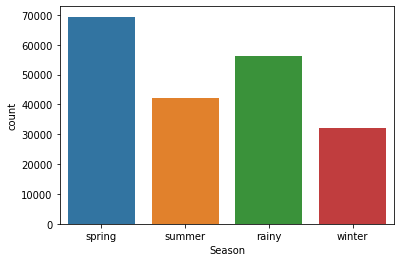

In [ ]:
# now let's see how many rows are there for each season
sns.countplot(x="Season", data=sfpd5)

## Top 5 Start Station 

In [ ]:
# Finding the top 5 starting stations name
top_cycle_spot=sfpd5['StartStationName'].value_counts().reset_index().head(5)
top_cycle_spot

,index,StartStationName
0,"Belgrove Street , King's Cross",1655
1,"Waterloo Station 3, Waterloo",1529
2,"Waterloo Station 1, Waterloo",1328
3,"Albert Gate, Hyde Park",1325
4,"Wormwood Street, Liverpool Street",1311


In [ ]:
sfpd5['Startyear'].value_counts()

2019    200000
Name: Startyear, dtype: int64

## Target Distribution

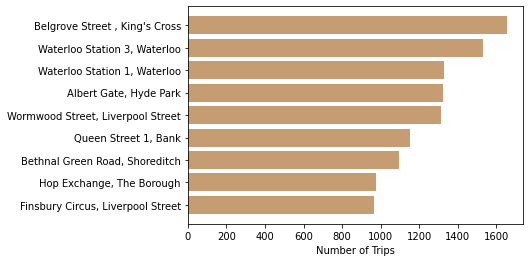

In [ ]:
# Get 10 most common start stations
most_common_cat = sfpd5['StartStationName'].value_counts()[0:9].sort_values()
most_common_cat.values


categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Number of Trips')
plt.show()

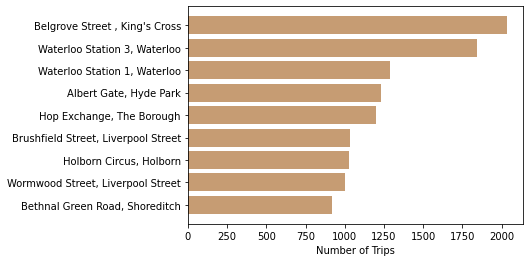

In [ ]:
# Get 10 most common end stations
most_common_cat = sfpd5['EndStationName'].value_counts()[0:9].sort_values()
most_common_cat.values


categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Number of Trips')
plt.show()

In [ ]:
# import plotly.offline as py
# import plotly.graph_objs as go
# commo_dis=sfpd5['StartStationName'].value_counts().sort_values(ascending=False).reset_index().head(10)
# commo_dis.columns=['StartStationName','Count']
# data = [go.Bar(
#             y=commo_dis.StartStationName,
#             x=commo_dis.Count,
#              opacity=0.6,
#              orientation = 'h'
#     )]

# py.iplot(data, filename='basic-bar')

In [ ]:
# percentage distribution of top most parking spots
import plotly.offline as py
import plotly.graph_objs as go
year_count=sfpd5['EndStationName'].value_counts().reset_index().sort_values(by='index').head(10)
year_count.columns=['EndStationName','Count']
# Create a trace
tag = (np.array(year_count.EndStationName))
sizes = (np.array((year_count['Count'] / year_count['Count'].sum())*100))
plt.figure(figsize=(15,8))

trace = go.Pie(labels=tag, values=sizes)
layout = go.Layout(title='Top Address with Most Cycle drop')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Activity Distribution")

<Figure size 1080x576 with 0 Axes>

## Year Distribution

In [ ]:
year_count=sfpd5['Startyear'].value_counts().reset_index().sort_values(by='index')
year_count.columns=['Startyear','Count']
# Create a trace
trace = go.Scatter(
    x = year_count.Startyear,
    y = year_count.Count
)

data = [trace]

py.iplot(data, filename='basic-line')

In [ ]:
# https://jovian.ai/msameeruddin/00-cs1-eda-mv-tsa-bow-tfidf-final#C53
def plot_column_distribution(df, column):
    """Plot the distribution of the column from dataframe"""
    
    column_val_df = df[column].value_counts().to_frame().reset_index()
    column_val_df.columns = [column, 'count']
    
    fig = px.bar(data_frame=column_val_df, x=column, y='count')
    fig.update_layout(
        autosize=True,
        height=600,
        hovermode='closest',
        showlegend=True,
        margin=dict(l=10, r=10, t=30, b=0)
    )
    
    fig.show()
    return None

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

## Hour-type Distribution

In [ ]:
plot_column_distribution(df=sfpd5, column='HourType')

## Distribution over the Week

In [ ]:
plot_column_distribution(df=sfpd5, column='Startday_of_week')

plot_column_distribution(df=sfpd5, column='Startday_of_week')

In [ ]:
sfpd5.describe().style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

,Duration,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour,Is_weekend
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,1043.931000,2019.000000,5.598510,3.238425,2.729135,13.440455,2019.000000,5.597260,3.243180,2.728760,13.639770,0.000000
std,3455.886684,0.000000,3.435083,4.943376,2.144686,4.816643,0.000000,3.434659,4.947608,2.144866,4.843792,0.000000
min,60.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,480.000000,2019.000000,2.000000,1.000000,0.000000,9.000000,2019.000000,2.000000,1.000000,0.000000,9.000000,0.000000
50%,780.000000,2019.000000,6.000000,1.000000,3.000000,14.000000,2019.000000,6.000000,1.000000,3.000000,14.000000,0.000000
75%,1140.000000,2019.000000,8.000000,1.000000,4.000000,17.000000,2019.000000,8.000000,1.000000,4.000000,18.000000,0.000000
max,484800.000000,2019.000000,12.000000,15.000000,6.000000,23.000000,2019.000000,12.000000,15.000000,6.000000,23.000000,0.000000


In [ ]:
cross_tab_train = pd.crosstab(sfpd5['StartStationName'], sfpd5['Season'])

In [ ]:
cross_tab_train.style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

Season,rainy,spring,summer,winter
StartStationName,,,,
"Abbey Orchard Street, Westminster",107,111,44,47
"Abbotsbury Road, Holland Park",9,19,17,11
"Aberdeen Place, St. John's Wood",31,52,37,22
"Aberfeldy Street, Poplar",3,8,10,3
"Abingdon Green, Westminster",107,132,54,67
"Abingdon Villas, Kensington",20,52,17,37
"Abyssinia Close, Clapham Junction",15,16,19,9
"Ackroyd Drive, Bow",36,43,46,18
"Ada Street, Hackney Central",101,98,35,42


In [ ]:
hour_vs_cate = sfpd5.groupby(['StartStationName', 'Starthour'], as_index=False).count()

In [ ]:
# hour_vs_cate.style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

In [ ]:
hour_vs_cate_pv = hour_vs_cate.pivot(index='Starthour', columns='StartStationName', values='Startday_of_month') #.fillna(0)

In [ ]:
hour_vs_cate_pv.style.background_gradient(cmap='mako_r', text_color_threshold=0.02)

In [ ]:
ct_holiday_cat = pd.crosstab(sfpd5['StartStationName'], sfpd5['Season'])
ct_holiday_cat.T

StartStationName,"Abbey Orchard Street, Westminster","Abbotsbury Road, Holland Park","Aberdeen Place, St. John's Wood","Aberfeldy Street, Poplar","Abingdon Green, Westminster","Abingdon Villas, Kensington","Abyssinia Close, Clapham Junction","Ackroyd Drive, Bow","Ada Street, Hackney Central","Addison Road, Holland Park",...,"Wood Street, Guildhall","Woodstock Grove, Shepherd's Bush","Woodstock Street, Mayfair","World's End Place, West Chelsea","Wormwood Street, Liverpool Street","Wren Street, Holborn","Wright's Lane, Kensington","Wynne Road, Stockwell","York Hall, Bethnal Green","York Way, Kings Cross"
Season,,,,,,,,,,,,,,,,,,,,,
rainy,107,9,31,3,107,20,15,36,101,29,...,94,88,53,48,391,149,92,22,99,65
spring,111,19,52,8,132,52,16,43,98,23,...,117,78,88,83,488,147,108,26,136,83
summer,44,17,37,10,54,17,19,46,35,16,...,28,95,21,63,151,94,89,26,88,43
winter,47,11,22,3,67,37,9,18,42,13,...,57,9,35,49,281,47,41,9,60,39


In [ ]:
sfpd5.head(2)

,Duration,EndStationName,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour,Season,Is_weekend,HourType
0,660,"Bricklayers Arms, Borough","Stamford Street, South Bank",2019,2,1,4,17,2019,2,1,4,17,spring,0,evening
1,900,"Leonard Circus , Shoreditch","Belgrove Street , King's Cross",2019,2,1,4,14,2019,2,1,4,14,spring,0,noon


# **Data Preparation**

## Assign Target and Input Variables

In [ ]:
y =sfpd5['Season'] 
x =sfpd5.drop(['Season'],axis=1)
x.head()


,Duration,EndStationName,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour,Is_weekend,HourType
0,660,"Bricklayers Arms, Borough","Stamford Street, South Bank",2019,2,1,4,17,2019,2,1,4,17,0,evening
1,900,"Leonard Circus , Shoreditch","Belgrove Street , King's Cross",2019,2,1,4,14,2019,2,1,4,14,0,noon
2,480,"Great Russell Street, Bloomsbury","Belgrove Street , King's Cross",2019,2,1,4,8,2019,2,1,4,8,0,morning
3,720,"Broadcasting House, Marylebone","Belgrove Street , King's Cross",2019,2,1,4,7,2019,2,1,4,7,0,morning
4,1020,"Chapel Place, Marylebone","Belgrove Street , King's Cross",2019,4,1,0,9,2019,4,1,0,9,0,morning


In [ ]:
y.head()

0    spring
1    spring
2    spring
3    spring
4    summer
Name: Season, dtype: object

## Label Encoding and Dataset Split

In [ ]:
categorical_cols = ['EndStationName','StartStationName','HourType'] 

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
x[categorical_cols] = x[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [ ]:
X_train.head(1)

,Duration,EndStationName,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour,Is_weekend,HourType
9775,480,106,177,2019,8,1,3,8,2019,8,1,3,8,0,2


In [ ]:
y_train.head(1)

9775    rainy
Name: Season, dtype: object

## Correlation Matrix

In [ ]:
X_train.corr()

,Duration,EndStationName,StartStationName,Startyear,Startmonth,Startday_of_month,Startday_of_week,Starthour,Endyear,Endmonth,Endday_of_month,Endday_of_week,Endhour,Is_weekend,HourType
Duration,1.000000,0.001528,-0.004779,NaN,-0.007623,0.007868,0.027490,-0.009949,NaN,-0.011609,0.018211,0.017271,0.009663,NaN,0.004827
EndStationName,0.001528,1.000000,0.033706,NaN,-0.002107,0.002642,0.002249,0.012485,NaN,-0.002156,0.002685,0.002405,0.012160,NaN,-0.009430
StartStationName,-0.004779,0.033706,1.000000,NaN,-0.000114,-0.007097,-0.002027,-0.006027,NaN,0.000050,-0.007200,-0.002060,-0.007051,NaN,-0.000707
Startyear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Startmonth,-0.007623,-0.002107,-0.000114,NaN,1.000000,-0.607499,0.216640,-0.001541,NaN,0.998185,-0.605620,0.217932,-0.003993,NaN,0.004286
Startday_of_month,0.007868,0.002642,-0.007097,NaN,-0.607499,1.000000,-0.180792,0.008546,NaN,-0.607435,0.998986,-0.181756,0.012423,NaN,0.005914
Startday_of_week,0.027490,0.002249,-0.002027,NaN,0.216640,-0.180792,1.000000,0.005484,NaN,0.215170,-0.179472,0.996694,0.007783,NaN,0.026816
Starthour,-0.009949,0.012485,-0.006027,NaN,-0.001541,0.008546,0.005484,1.000000,NaN,-0.002046,0.009947,0.005968,0.963832,NaN,-0.059791
Endyear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Endmonth,-0.011609,-0.002156,0.000050,NaN,0.998185,-0.607435,0.215170,-0.002046,NaN,1.000000,-0.608153,0.216648,-0.003286,NaN,0.004419


## **Model**

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(penalty = 'l2',random_state = 0)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
LR_pred = LR_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, LR_pred)

0.860375

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

       rainy       0.73      0.80      0.76     11174
      spring       1.00      1.00      1.00     13813
      summer       0.93      0.90      0.92      8487
      winter       0.70      0.62      0.66      6526

    accuracy                           0.86     40000
   macro avg       0.84      0.83      0.83     40000
weighted avg       0.86      0.86      0.86     40000



In [ ]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

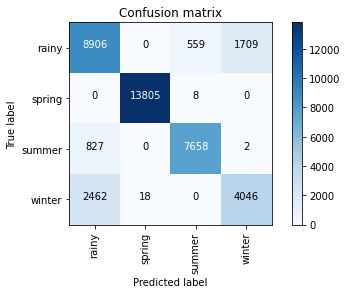

In [ ]:
labels =  ['rainy','spring','summer','winter']
confusion_mtx = confusion_matrix(y_test, LR_pred)
plot_confusion_matrix(confusion_mtx, 
            classes =labels)

## Extreme Gradient Boosting Classifier

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=100, learning_rate=1.0,
max_depth=1, random_state=0,objective='multi:softprob',num_class=3)
XGB.fit(X_train, y_train)

XGBClassifier(learning_rate=1.0, max_depth=1, num_class=3,
              objective='multi:softprob')

In [ ]:
XGB_pred = XGB.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, XGB_pred)

1.0

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, XGB_pred))

              precision    recall  f1-score   support

       rainy       1.00      1.00      1.00     11174
      spring       1.00      1.00      1.00     13813
      summer       1.00      1.00      1.00      8487
      winter       1.00      1.00      1.00      6526

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



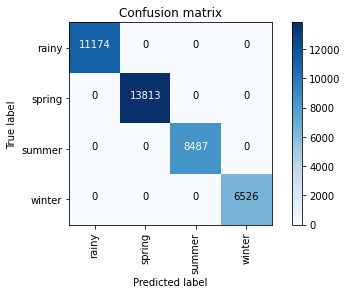

In [ ]:
labels =  ['rainy','spring','summer','winter']
confusion_mtx = confusion_matrix(y_test, XGB_pred)
plot_confusion_matrix(confusion_mtx, 
            classes =labels)

## Multi Layer Perceptron Classifier

In [ ]:
# https://www.youtube.com/watch?v=C6J1cgW6i9Y
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(random_state=10)
MLP_model.fit(X_train, y_train)

MLPClassifier(random_state=10)

In [ ]:
MLP_pred = MLP_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, MLP_pred)

0.999

In [ ]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, MLP_pred))
labels =  ['NonViolent','Violent']

              precision    recall  f1-score   support

       rainy       1.00      1.00      1.00     11174
      spring       1.00      1.00      1.00     13813
      summer       1.00      1.00      1.00      8487
      winter       1.00      1.00      1.00      6526

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



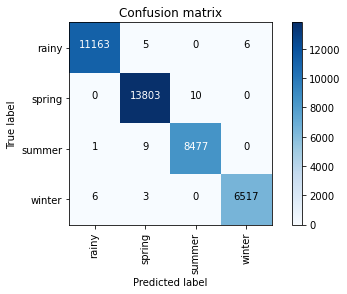

In [ ]:
labels =  ['rainy','spring','summer','winter']
confusion_mtx = confusion_matrix(y_test, MLP_pred)
plot_confusion_matrix(confusion_mtx, 
            classes =labels)

## Feature Importance

In [ ]:
importances = pd.DataFrame({'feature': X_train.columns,
                            'importance': np.round(XGB.feature_importances_, 5)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances

,importance
feature,
Endmonth,0.50028
Startmonth,0.49972
Duration,0.00000
EndStationName,0.00000
StartStationName,0.00000
Startyear,0.00000
Startday_of_month,0.00000
Startday_of_week,0.00000
Starthour,0.00000


# **Results of all Models**

In [ ]:
print('LogisticRegression Model : ', accuracy_score(y_test, LR_pred))
print('MLP Model : ', accuracy_score(y_test, MLP_pred))
print('XGB Model : ', accuracy_score(y_test, XGB_pred))

LogisticRegression Model :  0.860375
MLP Model :  0.999
XGB Model :  1.0
